In [1]:
import pandas as pd

# Replace 'your_file.csv' with the path to your CSV file
df = pd.read_csv('ds.csv')

# Display the first few rows of the DataFrame
print(df.head())


C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


            Timestamp         Họ và tên Chiều cao của bạn Cân nặng của bạn  \
0  10/29/2024 9:53:54           Mai Anh              1m70             55kg   
1  10/29/2024 9:53:56  Nguyễn Cảnh Hưng               173               70   
2  10/29/2024 9:53:58   Nguyễn Minh Đức               165               65   
3  10/29/2024 9:54:02   Nguyễn Hữu Giáp               178               70   
4  10/29/2024 9:54:05     Vũ Hoàng Hiệp              1m69               62   

  Giới tính  
0        Nữ  
1       Nam  
2       Nam  
3       Nam  
4       Nam  


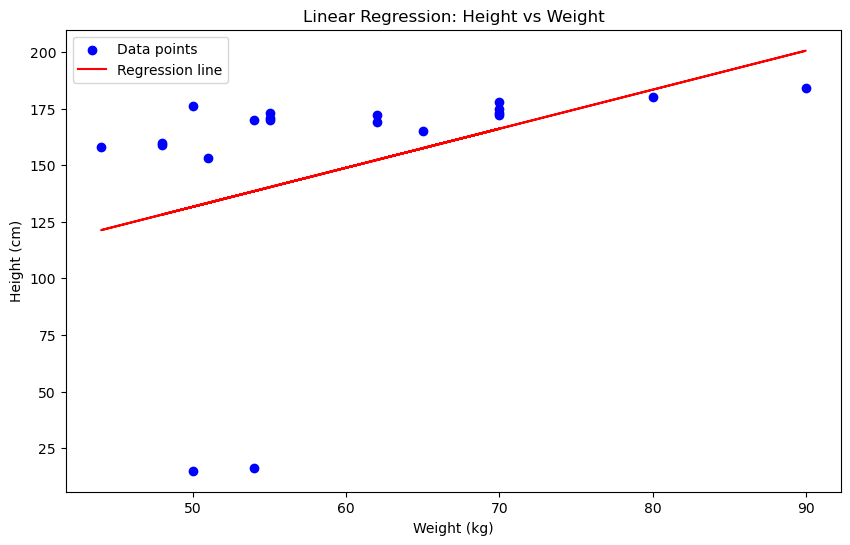

In [15]:
import pandas as pd
import re
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('ds.csv')

# Function to clean height and weight values
def clean_numeric(value):
    # Remove any non-numeric characters except for '.'
    value = re.sub(r'[^0-9.]', '', str(value))
    try:
        return float(value)
    except ValueError:
        return None  # Return None if conversion fails

# Apply cleaning function to height and weight columns
df['Height'] = df['Chiều cao của bạn'].apply(clean_numeric)
df['Weight'] = df['Cân nặng của bạn'].apply(clean_numeric)

# Drop rows with missing or invalid values
df = df.dropna(subset=['Height', 'Weight'])

# Split the data into training and testing sets
X = df[['Weight']]
y = df['Height']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions for plotting the regression line
y_pred_line = model.predict(X)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df['Weight'], df['Height'], color='blue', label='Data points')
plt.plot(df['Weight'], y_pred_line, color='red', label='Regression line')
plt.xlabel('Weight (kg)')
plt.ylabel('Height (cm)')
plt.title('Linear Regression: Height vs Weight')
plt.legend()
plt.show()


In [16]:
# Predict on test set
y_pred_test = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred_test)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 836.8876632242668


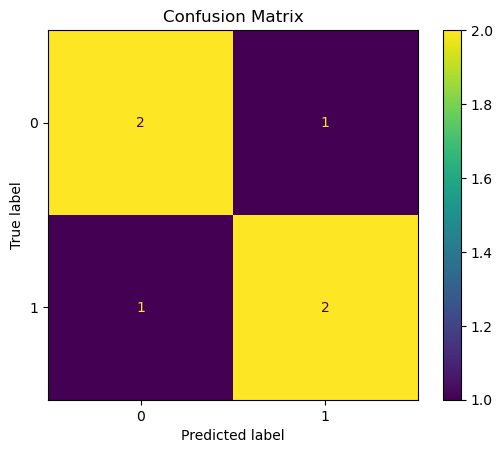

In [9]:
import pandas as pd
import re
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import joblib

# Load data
df = pd.read_csv('ds.csv')

# Function to clean height and weight values
def clean_numeric(value):
    # Remove any non-numeric characters except for '.'
    value = re.sub(r'[^0-9.]', '', str(value))
    try:
        return float(value)
    except ValueError:
        return None  # Return None if conversion fails

# Apply cleaning function to height and weight columns
df['Height'] = df['Chiều cao của bạn'].apply(clean_numeric)
df['Weight'] = df['Cân nặng của bạn'].apply(clean_numeric)

# Drop rows with missing or invalid values
df = df.dropna(subset=['Height', 'Weight'])

# Split the data into training and testing sets
X = df[['Weight']]
y = df['Height']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Save the model
joblib.dump(model, 'linear_regression_model.pkl')
print("Model saved as 'linear_regression_model.pkl'.")

# Function to load the model and make a prediction
def predict_height(weight):
    # Load the saved model
    loaded_model = joblib.load('linear_regression_model.pkl')
    # Predict the height
    predicted_height = loaded_model.predict([[weight]])
    return predicted_height[0]

# Example usage
weight_input = 70  # Replace this with the weight you want to predict height for
predicted_height = predict_height(weight_input)
print(f"Predicted height for weight {weight_input} kg: {predicted_height:.2f} cm")


Model saved as 'linear_regression_model.pkl'.
Predicted height for weight 70 kg: 166.12 cm


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [12]:
import pandas as pd
import re
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import joblib

# Load data
df = pd.read_csv('ds.csv')

# Function to clean height and weight values
def clean_numeric(value):
    # Remove any non-numeric characters except for '.'
    value = re.sub(r'[^0-9.]', '', str(value))
    try:
        return float(value)
    except ValueError:
        return None  # Return None if conversion fails

# Apply cleaning function to height and weight columns
df['Height'] = df['Chiều cao của bạn'].apply(clean_numeric)
df['Weight'] = df['Cân nặng của bạn'].apply(clean_numeric)

# Drop rows with missing or invalid values
df = df.dropna(subset=['Height', 'Weight'])

# Set Height as the input (X) and Weight as the target (y)
X = df[['Height']]
y = df['Weight']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Save the model
joblib.dump(model, 'height_to_weight_model.pkl')
print("Model saved as 'height_to_weight_model.pkl'.")

# Function to load the model and make a prediction
def predict_weight(height):
    # Load the saved model
    loaded_model = joblib.load('height_to_weight_model.pkl')
    # Predict the weight
    predicted_weight = loaded_model.predict([[height]])
    return predicted_weight[0]

# Example usage
height_input = 170  # Replace this with the height you want to predict weight for
predicted_weight = predict_weight(height_input)
print(f"Predicted weight for height {height_input} cm: {predicted_weight:.2f} kg")


Model saved as 'height_to_weight_model.pkl'.
Predicted weight for height 170 cm: 62.93 kg


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
